In [1]:
import pandas as pd
import sys
import csv
import re
pd.set_option('display.max_colwidth', -1)

In [2]:
data = pd.read_csv("../data/tweets_public_es.csv", encoding = "utf-16", sep = ",")
df = data.drop_duplicates(subset='text')

In [3]:
url_pattern = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
url_dict = dict()
for index,row in df.iterrows():
    text = row["text"].lower().strip()
    link = re.findall(url_pattern, text)
    for i in link:
        if len(i) > 0:
            if i not in url_dict:
                url_dict[i] = 1
            else:
                url_dict[i] += 1
urls = pd.DataFrame.from_dict(url_dict, orient = 'index').reset_index().rename(columns={'Index': 'url', 0:'count'})

In [4]:
len(url_dict)

5448

In [4]:
#urls.to_csv("urls_grouped.csv", sep = "\t", encoding = "utf-8", index = False)
urls.sort_values(["count"], ascending = False).head(5)

,index,count
787,https://t.co/tg22njbvmj,3
1009,https://t.co/eiq5jfzwjh,3
168,https://t.co/63s4gwra1b,3
2201,https://t.co/enqtdp2pln,3
860,https://t.co/czbhzfeeki,3


In [11]:
# to check tweets one by one
df[df["text"].str.contains("https://t.co/63s4gwra1b", case = False)]

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
258,neutral,False,0,0,Así se bajó un pasajero de RyanAir harto de esperar para desembarcar https://t.co/63S4gwRA1B https://t.co/2nl0IYtDzE https://t.co/bkhry8gUWF,NaN,Thu Jan 04 08:06:38 +0000 2018,948828000287625216,NaN,Madrid
3045,negative,False,0,0,Así se bajó un pasajero de RyanAir harto de esperar para desembarcar https://t.co/63S4gwRA1B https://t.co/f03ztfVPbE https://t.co/s7boMyLwtl,NaN,Thu Jan 04 13:07:07 +0000 2018,948903621713911808,NaN,Madrid
6224,neutral,False,0,0,Ryanair no se conforma sólo con los vuelos https://t.co/63S4gwRA1B https://t.co/MvIcLIMW7h https://t.co/3KQ9RP8fcq,NaN,Fri Nov 17 11:44:45 +0000 2017,931488275524710401,NaN,Madrid


# This takes hours, so I leave it here as a markdown. Feel free to convert to code to run - for results see drive.

# Note that not all tiny urls get unshortened, probably due to the refused connection. 

import requests
import csv
import time


myfile = open("urls_grouped.csv", "rb")

lines = myfile.readlines()[1:]


with open("urls_extracted.csv", "wb") as csv_file:
    writer = csv.writer(csv_file, delimiter = "\t")
    
    for i in lines:
        short_link = i.split("\t")[0]
        count = int(i.split("\t")[1])
        print short_link
        try:
            r = requests.head(short_link, allow_redirects = True)
            long_link = r.url
            if short_link != long_link:
                writer.writerow([short_link, long_link, count])
            else:
                pass
            print "sleeping"
            time.sleep(2)
        except requests.exceptions.ConnectionError:
            r.status_code = "Connection refused"


myfile.close()

In [7]:
# maybe check those tweets, which have more than one link
import re
def count_links(df):
    df["nr_links"] = 0
    for index,row in df.iterrows():
        result = re.findall("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", row["text"])
        df.set_value(index, "nr_links", len(result))
count_links(df)

/home/borbota/anaconda/envs/uab/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/borbota/anaconda/envs/uab/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


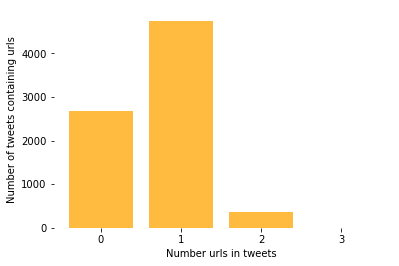

In [52]:
# import matplotlib.pyplot as plt
nr_links = df["nr_links"].value_counts().reset_index()
fig, ax = plt.subplots()
plt.bar(nr_links["index"], nr_links["nr_links"], align='center', alpha=0.75, color='orange')
plt.xticks(nr_links["index"])
plt.ylabel('Number of tweets containing urls')
plt.xlabel('Number urls in tweets')
ax.spines['top'].set_visible(False) # remove frame
ax.spines['bottom'].set_visible(False) # remove frame
ax.spines['left'].set_visible(False) # remove frame
ax.spines['right'].set_visible(False) # remove frame

plt.show();

In [53]:
df["nr_links"].value_counts()

1    4745
0    2684
2    361 
3    4   
Name: nr_links, dtype: int64

In [63]:
df[df.nr_links == 3].tail(10)
#len(df[df["text"].str.contains("Iberia celebra", case = False)])

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,nr_links
258,neutral,False,0,0,Así se bajó un pasajero de RyanAir harto de esperar para desembarcar https://t.co/63S4gwRA1B https://t.co/2nl0IYtDzE https://t.co/bkhry8gUWF,NaN,Thu Jan 04 08:06:38 +0000 2018,948828000287625216,NaN,Madrid,3
3045,negative,False,0,0,Así se bajó un pasajero de RyanAir harto de esperar para desembarcar https://t.co/63S4gwRA1B https://t.co/f03ztfVPbE https://t.co/s7boMyLwtl,NaN,Thu Jan 04 13:07:07 +0000 2018,948903621713911808,NaN,Madrid,3
6224,neutral,False,0,0,Ryanair no se conforma sólo con los vuelos https://t.co/63S4gwRA1B https://t.co/MvIcLIMW7h https://t.co/3KQ9RP8fcq,NaN,Fri Nov 17 11:44:45 +0000 2017,931488275524710401,NaN,Madrid,3
6940,negative,False,0,0,Ryanair afronta la primera huelga de pilotos de su historia https://t.co/X2spJLiC5N by https://t.co/tDgnXZaRzE emba… https://t.co/bkkMWVReJw,NaN,Wed Dec 13 03:30:06 +0000 2017,940785874979229698,NaN,Pacific Time (US & Canada),3
